# Training a Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# Set random seed for reproducibility
torch.manual_seed(0)

1. Generate synthetic two-moons dataset

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [3]:
X.shape

(1000, 2)

Text(0.5, 1.0, 'Moons dataset')

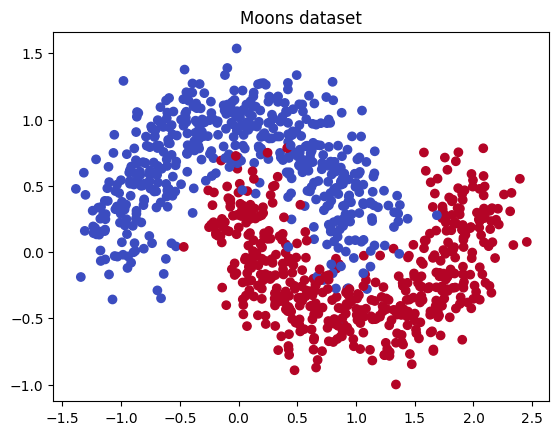

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title("Moons dataset")

Text(0.5, 1.0, 'Moons dataset Training')

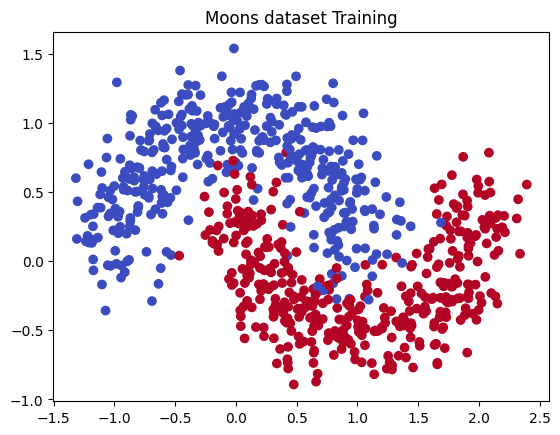

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Moons dataset Training")

Text(0.5, 1.0, 'Moons dataset Test')

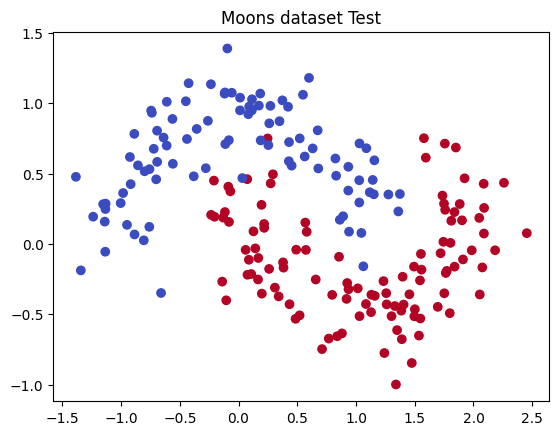

In [13]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title("Moons dataset Test")

2. Standardize features for faster convergence

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3. Convert arrays to PyTorch tensors

In [5]:
type_map = {"float": torch.float32, "long": torch.long}
X_train_tensor = torch.tensor(X_train, dtype=type_map['float'])
y_train_tensor = torch.tensor(y_train, dtype=type_map['long'])
X_test_tensor = torch.tensor(X_test, dtype=type_map['float'])
y_test_tensor = torch.tensor(y_test, dtype=type_map['long'])

4. Create DataLoaders for batching

In [14]:
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

NameError: name 'X_train_tensor' is not defined

5. Define a simple feedforward neural network

In [7]:
class SimpleNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=2):
        super(SimpleNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

Instantiate network, loss function and optimizer

In [8]:
model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

6. Training loop

In [ ]:
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0

    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_preds / total_samples

    # Print progress every 10 epochs
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch}/{n_epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")

7. Evaluation on test set

In [ ]:
model.eval()
with torch.no_grad():
    correct_preds = 0
    total_samples = 0
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    test_accuracy = correct_preds / total_samples
    print(f"Test Accuracy: {test_accuracy:.4f}")